[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/Redes_Neuronales_Scratch/blob/main/semana3/FeedForward.ipynb)

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Una sola neurona, la base de todo

<center>
  <img src='https://github.com/MaxMitre/Redes_Neuronales_Scratch/blob/main/semana3/images/without_dot.png?raw=true'>
</center>

[Respuesta](https://github.com/MaxMitre/Redes_Neuronales_Scratch/blob/main/semana3/images/with_dot.png?raw=true)

# Una red neuronal con varias capas ocultas

<center>
  <img src='https://github.com/MaxMitre/Redes_Neuronales_Scratch/blob/main/semana3/images/3layer.png?raw=true' width=1000>
</center>

Los puntos en la imagen solo son para evitar poner todas las flechas, pero significa que todas las nueronas se conectan con todas las neuronas siguientes

En esta red, los pesos (w, w prima, w bi-prima) son los algunos de los parámetros del modelo, estos influyen lo que entrará en la siguiente capa.

La notación $N_{i,j}$ representa la neurona $i$-ésima de la capa $j$-ésima

La notación $w_{i,j}$ representa el peso que va de la $i$-ésima entrada a la $j$-ésima neurona. Los pesos $w$ son de la primera capa, los $w^{\prime}$ los de la siguiente y $w^{\prime\prime}$ los de la siguiente.

Preguntas:

1. ¿Cuantas características tendrán nuestros datos con los que alimentaremos el modelo?
2. ¿Cuantas capas ocultas tiene la red?
3. ¿Cuantos parámetros a entrenar tiene TODA la red?
4. Mencione 3 funciones de activación que conozca
5. ¿Porque son importantes los distintos tipos de funciones de activación?

Hagamos los calculos para la red anterior, utilizando solo 2 datos (esto representaría 2 filas de alguna base de datos, posteriormente solo aumentarian la forma de esta matriz de 2x3 a Nx3, con N la cantidad de filas de su base de datos)

In [ ]:
np.random.seed(11)

In [ ]:
# Datos, matriz X
X = np.array([[1,3,-1],[-1,1,4]]) 
X

array([[ 1,  3, -1],
       [-1,  1,  4]])

In [ ]:
# Etiqueta de los datos, o valor que buscamos aproximar: Y
Y = np.array([[3],[-1]])
Y

array([[ 3],
       [-1]])

In [ ]:
# Matriz de pesos que alimentarian la primer capa, W_1
W_1 = np.random.normal(0, 0.1, (3, 4)) # Jugaremos con este parametro
W_1

array([[ 0.17494547, -0.0286073 , -0.04845651, -0.26533186],
       [-0.00082846, -0.03196314, -0.05366294,  0.03154027],
       [ 0.04210507, -0.1065603 , -0.08862397, -0.04757335]])

In [ ]:
X@W_1

array([[ 0.13035501, -0.01793641, -0.12082135, -0.12313771],
       [-0.00735365, -0.42959703, -0.35970229,  0.10657873]])

In [ ]:
# biases, sesgos o interceptos que alimentarán la primer capa
b_1 = np.random.normal(0,0.1, 4)
b_1

array([ 0.06896823,  0.05611922, -0.13055485, -0.11194753])

In [ ]:
X@W_1 + b_1

array([[ 0.19932324,  0.03818281, -0.25137621, -0.23508523],
       [ 0.06161458, -0.37347781, -0.49025714, -0.0053688 ]])

¿A quien representa esta salida (X@W_1 + b_1) ? ¿Que se hace con ella?

# Siguiente paso en la red

In [ ]:
X_2 = X @ W_1 + b_1
X_2

array([[ 0.19932324,  0.03818281, -0.25137621, -0.23508523],
       [ 0.06161458, -0.37347781, -0.49025714, -0.0053688 ]])

In [ ]:
W_2 = np.random.normal(0, 0.1, (4, 3))
W_2

array([[ 0.07368374,  0.15746341, -0.00310751],
       [-0.06834466,  0.10956297, -0.03095766],
       [ 0.07257522,  0.15490716,  0.06300798],
       [ 0.00734932,  0.07322714, -0.06425754]])

In [ ]:
b_2 = np.random.normal(0,0.1, 3)
b_2

array([-0.01780932, -0.05739546, -0.02043753])

In [ ]:
X_3 = X_2 @ W_2 + b_2
X_3

array([[-0.02570343, -0.07798051, -0.02297169],
       [-0.02336409, -0.16495024, -0.03961213]])

# Por último

¿Como obtendrían la salida? (la y predicha)

In [ ]:
# Entrada
X_3

# Matriz de pesos
W_3 = np.random.normal(0, 0.1, (3,1))
# Sesgos (bias)
b_3 = np.random.normal(0, 0.1, 1)

# Y predichas
y_gorro = X_3 @ W_3 + b_3
y_gorro

array([[0.01247106],
       [0.01460617]])

**Ejercicio**: Realizar la composición de funciones que me daría las $y$ predichas ($\hat{y}$) dados solo los valores de entrada y los pesos

# ¿Que faltó en la alimentación de la red anterior?

Respuesta: - Funciones de activación

In [ ]:
# Funciones de activación
def step(x):
    return np.where(x > 0, 1, 0)

def linear(x):
    return x

def relu(x):
    return np.where(x > 0, x, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def leaky_relu(x):
    return np.where(x > 0, x, 0.01 * x)

In [ ]:
x_coord = np.linspace(-3, 3, 30)

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Activación Step (Escalonada)')

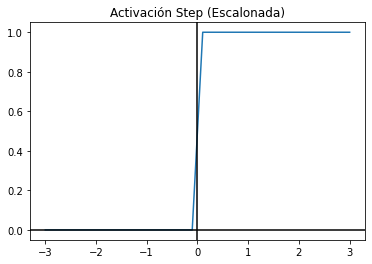

In [ ]:
plt.plot(x_coord, step(x_coord))
plt.axvline(x=0, c='black', label="x=0")
plt.axhline(y=0, c='black', label="y=0")
plt.title('Activación Step (Escalonada)')

Text(0.5, 1.0, 'Activación Lineal')

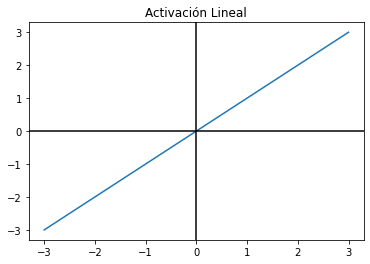

In [ ]:
plt.plot(x_coord, linear(x_coord))
plt.axvline(x=0, c='black', label="x=0")
plt.axhline(y=0, c='black', label="y=0")
plt.title('Activación Lineal')

Text(0.5, 1.0, 'Activación ReLu')

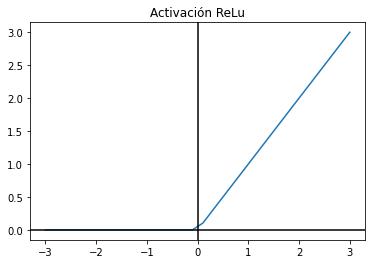

In [ ]:
plt.plot(x_coord, relu(x_coord))
plt.axvline(x=0, c='black', label="x=0")
plt.axhline(y=0, c='black', label="y=0")
plt.title('Activación ReLu')

Text(0.5, 1.0, 'Activación Sigmoide')

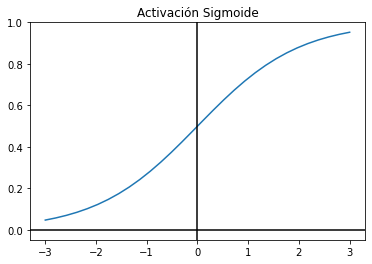

In [ ]:
plt.plot(x_coord, sigmoid(x_coord))
plt.axvline(x=0, c='black', label="x=0")
plt.axhline(y=0, c='black', label="y=0")
plt.title('Activación Sigmoide')

Text(0.5, 1.0, 'Activación TanH')

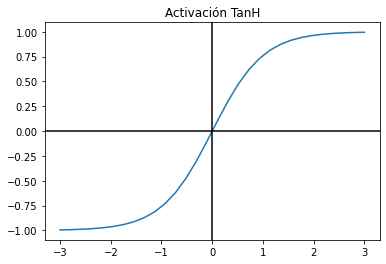

In [ ]:
plt.plot(x_coord, tanh(x_coord))
plt.axvline(x=0, c='black', label="x=0")
plt.axhline(y=0, c='black', label="y=0")
plt.title('Activación TanH')

Text(0.5, 1.0, 'Activación Leaky ReLu')

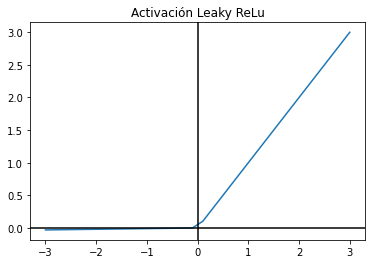

In [ ]:
plt.plot(x_coord, leaky_relu(x_coord))
plt.axvline(x=0, c='black', label="x=0")
plt.axhline(y=0, c='black', label="y=0")
plt.title('Activación Leaky ReLu')

# Características de las funciones de activación:


- Step:
  - Se basa en activarse o no dado un valor limite (threshold)
  - Solo soporta clasificadores binarios

- Lineal:
  - Derivada fácil de calcular
  - Al ser de derivada constante, interfiere con BackPropagation
  - Si solo utilizamos ésta como activación, nuestro problema es completamente lineal (usada en modelos de regresión simple) [No permite encontrar patrones complejos]

- ReLu (Rectified Linear Unit):
  - La más utilizada
  - Fácil de calcular, la red converge rapidamente
  - Sufre saturación para valores negativos (el gradiente no permite actualizar)

- Sigmoide:
  - Muy útil para clasificadores binarios
  - Problema de desvanecimiento de gradiente (Gradient Vanishing)
  - Optimizar la función de perdida es un poco mas duro (los pesos solo se mueven en una dirección)

- tanH:
  - Estandariza la salida entre -1 y 1
  - Función centrada en cero (a diferencia de sigmoide) lo que hace la optimización un poco menos difícil
  - Sufre el problema de desvanecimiento de gradiente

- Leaky ReLu:
  - Fácil de calcular
  - Trada de solucionar los problema de ReLu para los valores negativos

¿Recuerdan la función de activación de la semana pasada? ¿Cual era la mayor diferencia con estas funciones?

# Implementación con función de activación en cada neurona

Este paso lo realizarán como ejercicio durante la clase para asegurarnos de la correcta comprensión de las cosas.

In [ ]:
# Espacio para respuesta del ejercicio y tiempo de comentar respuestas








# Caso práctico

Tenemos 2 modos de leerlo, usando "np.loadtxt" o "pd.read_csv"

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Curso-NN-de-Cero/semana2/precios_casas_3.csv')

In [ ]:
df

,LotArea,YearBuilt,GarageArea,SalePrice
0,8450,2003,548,208500
1,9600,1976,460,181500
2,11250,2001,608,223500
3,9550,1915,642,140000
4,14260,2000,836,250000
...,...,...,...,...
1455,7917,1999,460,175000
1456,13175,1978,500,210000
1457,9042,1941,252,266500
1458,9717,1950,240,142125


In [ ]:
matriz = np.array(df)
matriz

array([[  8450,   2003,    548, 208500],
       [  9600,   1976,    460, 181500],
       [ 11250,   2001,    608, 223500],
       ...,
       [  9042,   1941,    252, 266500],
       [  9717,   1950,    240, 142125],
       [  9937,   1965,    276, 147500]])

# Instrucciones:

- Convertir el DataFrame a matriz de numpy
- Separar características de la variable objetivo
- Estandarizar los datos (utilizando la media de los datos y los valores máximo y mínimos en cada columna)
- Crear la estructura de una red con 2 capas ocultas (la primer capa de tamaño 4, la segunda de tamaño 5 y 1 sola salida)
- En cada etapa utilizar una función de activación (al menos usar 2 variables de activación y justificar el porqué)
- Ver los resultados predichos de cada dato y compararlos con el original (la predicción no será buena, ¿Porque?)

In [ ]:
# La parte de características
X = matriz[:,:3]
# La parte de variables objetivos
Y = matriz[:,3]

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [ ]:
media_por_columna = X.mean(axis=0, keepdims=True)
std_por_columna = X.std(axis=0, keepdims=True)
procesada = (X - media_por_columna)/std_por_columna

In [ ]:
print(procesada)

[[-0.20714171  1.05099379  0.35100032]
 [-0.09188637  0.15673371 -0.06073101]
 [ 0.07347998  0.9847523   0.63172623]
 ...
 [-0.14781027 -1.00249232 -1.03391416]
 [-0.08016039 -0.70440562 -1.09005935]
 [-0.05811155 -0.20759447 -0.9216238 ]]
